In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from numba import njit, prange
from scipy.io import loadmat
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf
import dask.dataframe as dd

In [3]:
from analysis_routines import * 
from utide import solve
from harmonic_analysis import *
from plotting_routines_xr import *
from wavelet_analysis import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

ModuleNotFoundError: No module named 'analysis_routines'

In [ ]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
ds_buoy = load_buoy_series('AGL_ocean_meteo_20181116.nc')

In [ ]:
wavelet_power_spectrum(df_ci.D1, data.date, period=[None, datetime(2018, 11, 23), 6])

In [ ]:
Q_ = - ds_buoy.Qe.loc[datetime(2019, 3, 1):]  - ds_buoy.Qe.loc[datetime(2019, 3, 1):]
D1_ = df_ci.D1.loc[datetime(2019, 3, 1)::120*6]
cc = ccf(Q_, D1_)
plt.plot(cc)

In [ ]:
date_1 = datetime(2018, 11, 16)
date_2 = datetime(2018, 11, 30)
plot_AGL_data(ds_buoy,  ['Qe', 'Qh'], period=[date_1, date_2])
plot_column_temperature(data, df_ci, period=[date_1, date_2])
plot_thermistor_temperature(data, [0, 1, 2], period=[date_1, date_2])

In [ ]:
def std_MLD_thermistors(data):
    

In [34]:
from scipy.stats import chi2_contingency, spearmanr
dn = 12

D1_ = df_ci[datetime(2018, 11, 16):datetime(2018, 12, 27):120*6]['D1'].to_numpy()
wind_speed_ = df_buoy[datetime(2018, 11, 16):datetime(2018,12,27)]['wind_speed'].to_numpy()
obs = np.vstack([D1_, wind_speed_])
plt.scatter(wind_speed_, D1_)
spear = spearmanr(wind_speed_, D1_)
print(spear)

NameError: name 'df_buoy' is not defined

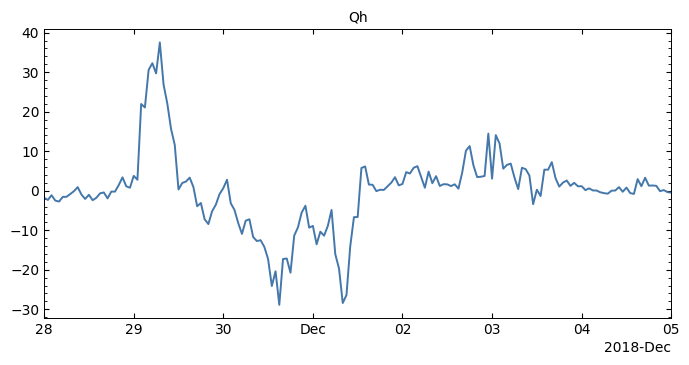

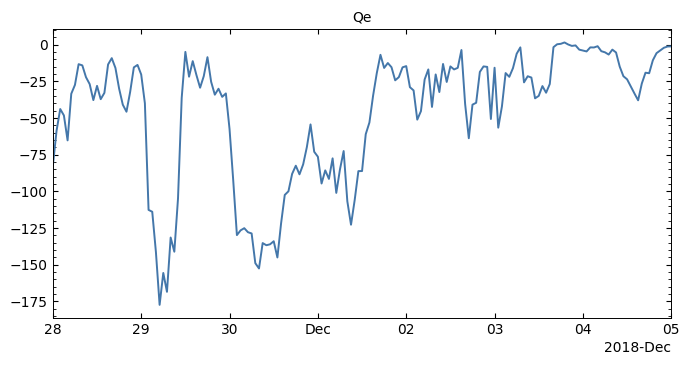

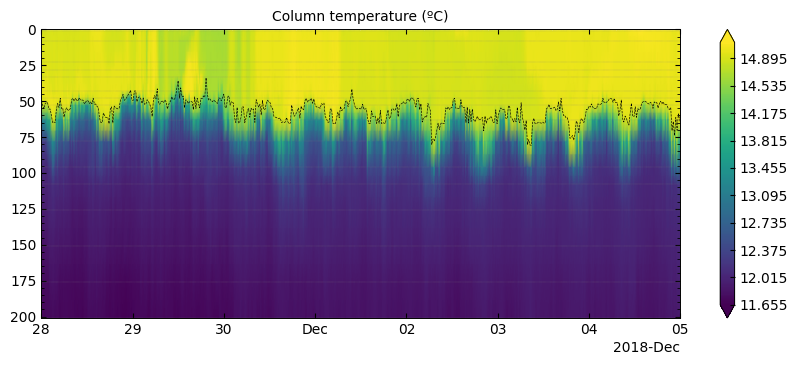

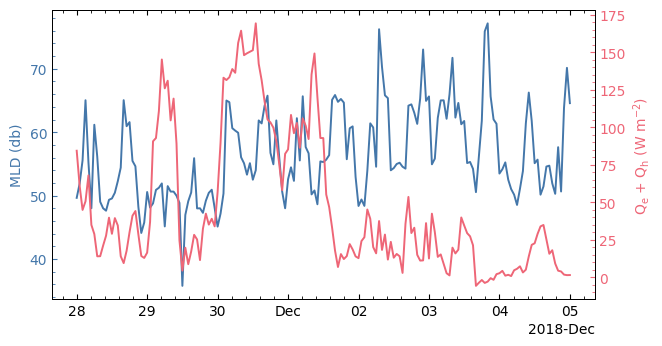

In [54]:
date_1 = datetime(2018, 11, 28)
date_2 = datetime(2018, 12, 5)
plot_AGL_data(ds_buoy, 'Qh', period=[date_1, date_2])
plot_AGL_data(ds_buoy, 'Qe', period=[date_1, date_2])

plot_column_temperature(data, df_ci, period=[date_1, date_2])
plot_MLD_and_fluxes(df_ci, ds_buoy, period=[date_1, date_2])

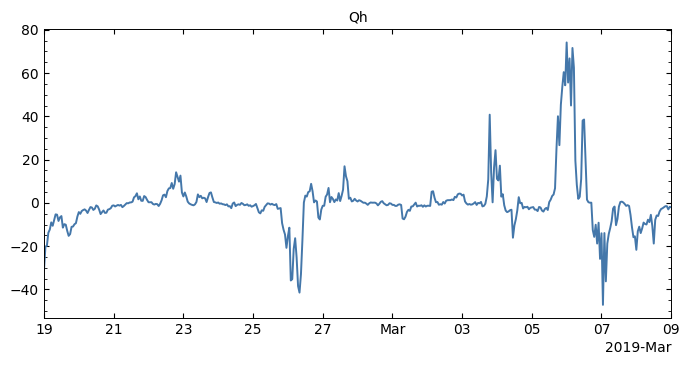

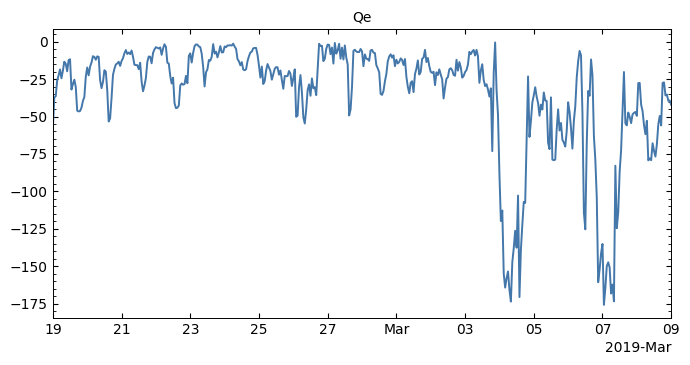

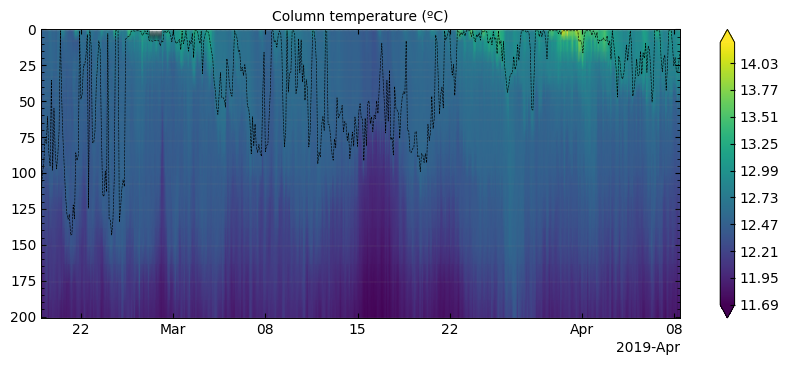

In [10]:
date_1 = datetime(2019, 2, 19)
date_2 = datetime(2019, 3, 9)
interval = timedelta(minutes=1)
plot_AGL_data(ds_buoy, 'Qh', period=[date_1, date_2])
plot_AGL_data(ds_buoy, 'Qe', period=[date_1, date_2])
plot_column_temperature(data, df_ci, period=[date_1, None])

In [102]:
def plot_MLD_and_fluxes(df_fit, ds_buoy, period=[None, None]):
    locator = mdates.AutoDateLocator(minticks=4, maxticks=None)
    formatter = mdates.ConciseDateFormatter(locator)
    minor_locator = mdates.AutoDateLocator(minticks=6)
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    
    slice_ = slice(*period)
    slice_fit = slice(period[0], period[1], 360)
    D1_ = df_fit.D1.loc[slice_fit]
    Q_e_ = ds_buoy.Qe.loc[slice_]
    Q_h_ = ds_buoy.Qh.loc[slice_]
    Q_ = Q_e_ + Q_h_
    date_buoy = ds_buoy.date.loc[slice_]
    date_fit = df_fit.loc[slice_fit].index
    
    fig, ax1 = plt.subplots(figsize=(7, 3.75))
    ax1.xaxis.set_major_locator(locator)
    #ax.set_xlim(date[0], date[-1])
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)
    ax1.xaxis.set_minor_locator(minor_locator)
    ax1.tick_params(axis='y', colors=colors[0], which='both')
    ax1.set_ylabel(r'MLD (db)', color=colors[0])  # we already handled the x-label with ax1
    ax1.plot(date_fit, D1_, color=colors[0])
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.set_ylabel('$\mathregular{Q_e}$ + $\mathregular{Q_h}$ (W m$^{-2}$)', color=colors[1])  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', colors=colors[1], which='both')
    ax2.plot(date_buoy, -Q_, color=colors[1])
    fig.tight_layout()
    plt.show()
    

SpearmanrResult(correlation=0.05859751774867788, pvalue=0.5685913644896312)


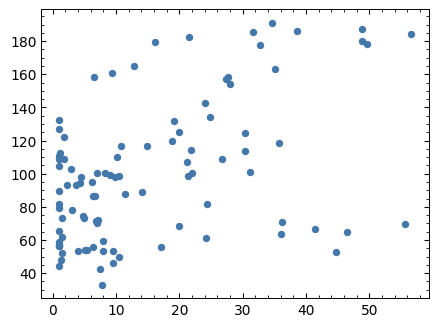

In [68]:
date_10 = datetime(2019, 3, 25)
date_11 = datetime(2019, 3, 29)
df_ci[date_10:date_11]
D1_ = df_ci[date_10:date_11:120*6]['D1'].to_numpy()
Qe_ = -ds_buoy.Qe.loc[date_10:date_11].data
Qh_ = -ds_buoy.Qh.loc[date_10:date_11].data
obs = np.vstack([D1_, Qe_ + Qh_])
plt.scatter(D1_, Qe_)
spear = spearmanr(Qh_, D1_)
print(spear)

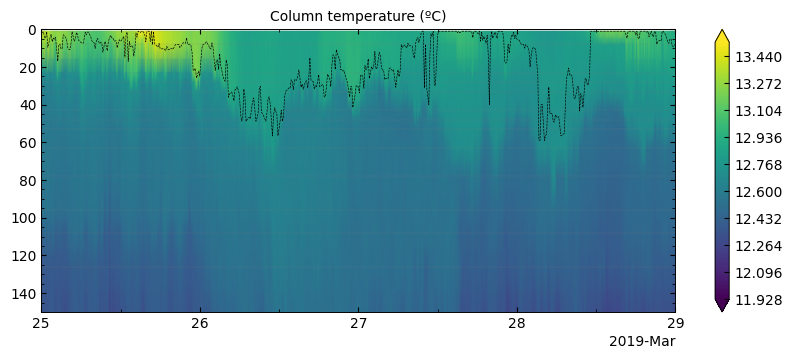

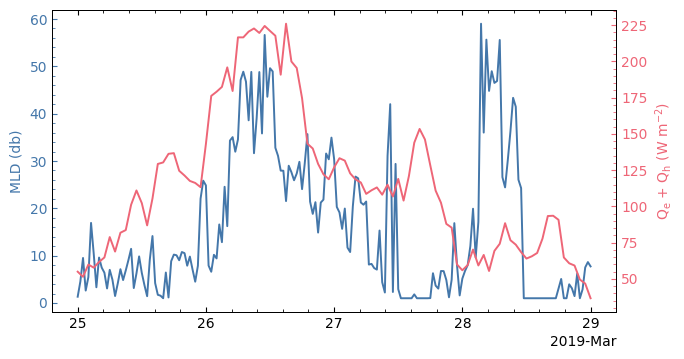

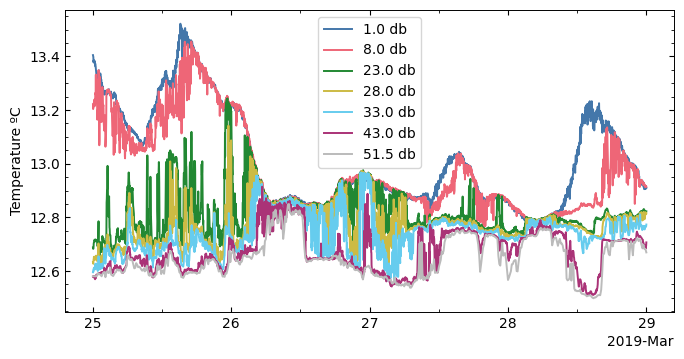

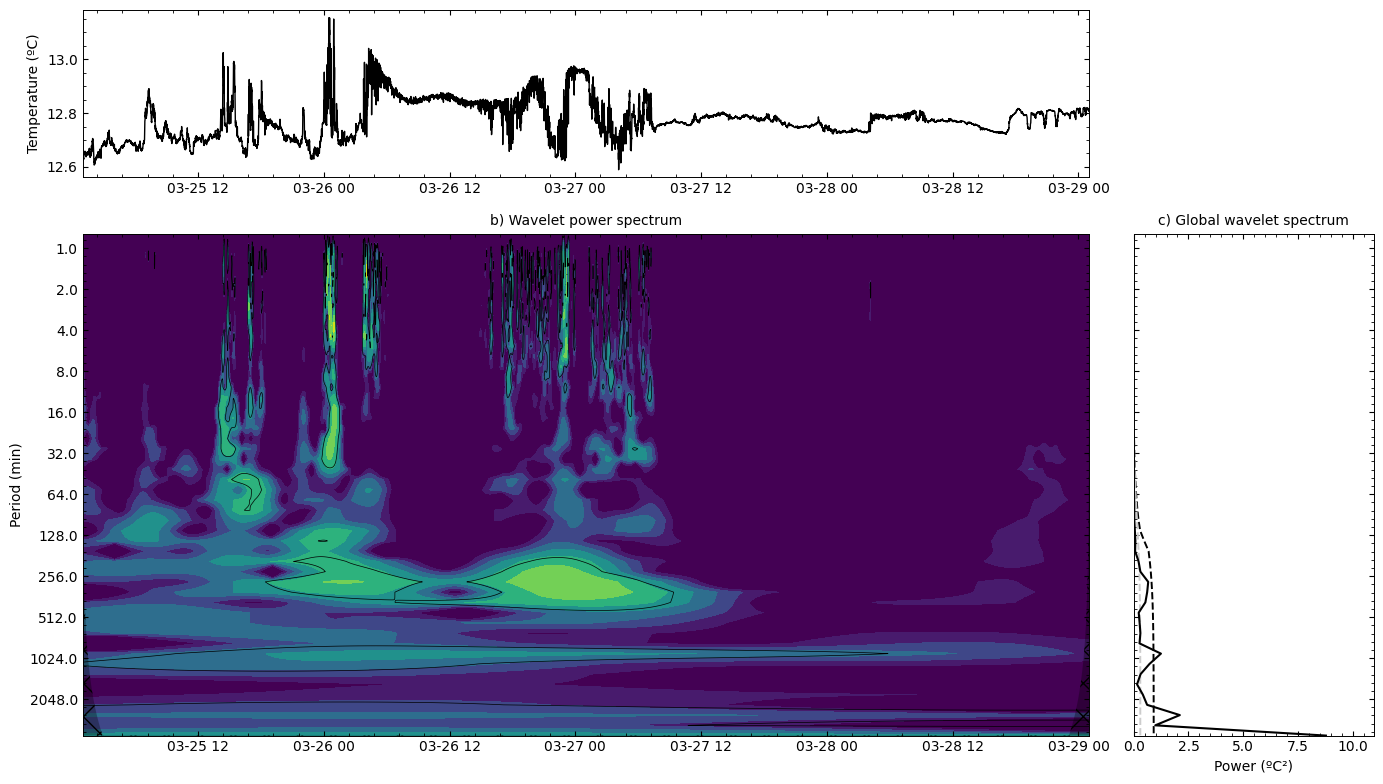

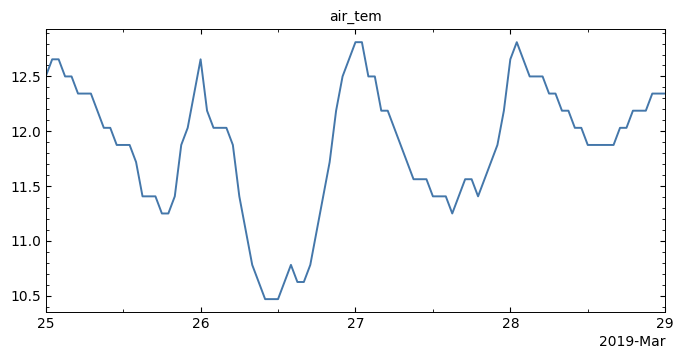

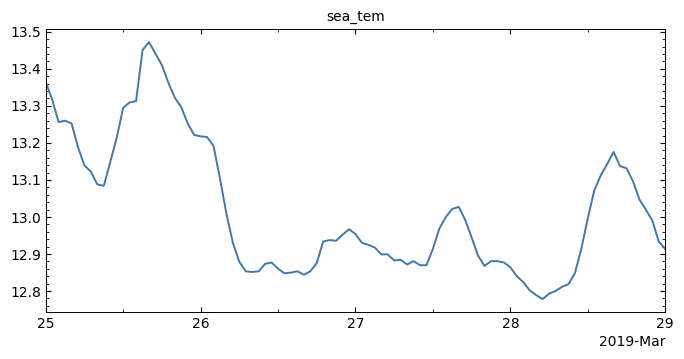

In [330]:
plot_column_temperature(data, df_ci, period=[date_10, date_11], ylims=[150, 0])
plot_MLD_and_fluxes(df_ci, ds_buoy, period=[date_10, date_11])
plot_thermistor_temperature(data, [0, 1, 2, 3, 4, 5, 6], period=[date_10, date_11, 24])
wavelet_power_spectrum(data.temp[:, 3], data.date, period=[date_10, date_11, 6])
plot_AGL_data(ds_buoy, 'air_tem', period=[date_10, date_11])
plot_AGL_data(ds_buoy, 'sea_tem', period=[date_10, date_11])


In [323]:
date_10_c = datetime(2019, 3, 25, 4)
date_11_c = datetime(2019, 3, 26, 12)
Q_c =+ds_buoy.Qe.loc[date_10_c:date_11_c]+ds_buoy.Qh.loc[date_10_c:date_11_c]
D1_c = df_ci.D1[date_10_c:date_11_c].to_numpy()
a1_c = df_ci.a1[date_10_c:date_11_c].to_numpy()
temp_8dbar = data.temp.loc[date_10_c:date_11_c, 8].data

energy_c = np.cumsum(Q_c*3600)/1000 # kJ/m²

rho_seawater = 1027 # kg m⁻³
cp_seawater = 4.003 # kJ / kg / k

energy_temp_a1 = rho_seawater*D1_c[:-1]*cp_seawater*(a1_c[1:] - a1_c[:-1])
cum_energy_temp = np.cumsum(energy_temp_a1)
energy_temp_8dbar = rho_seawater*D1_c[:-1]*cp_seawater*(temp_8dbar[1:] - temp_8dbar[:-1])
cum_energy_8dbar = np.cumsum(energy_temp_a1)

thermal_conductivity = 0.598 #W/m/K
dz = 1 # db

#q = - thermal_conductivity*(df_ci[date_10_c:date_11_c].apply(fit_))

df_ci_dask = dd.from_pandas(df_ci, npartitions=10)

df_ci_dask[date_10_c:date_11_c].apply(fit_function_row, axis=1, z=D1_c, meta=('x', 'f8')).compute()

date
2019-03-25 04:00:00    [13.20849999595103, 13.203443551994514, 13.187...
2019-03-25 04:00:05    [13.201950001390276, 13.201950001390276, 13.18...
2019-03-25 04:00:10    [13.211399997243728, 13.211399997243728, 13.21...
2019-03-25 04:00:15    [13.208132113627988, 13.208132113627988, 13.20...
2019-03-25 04:00:20    [13.200457088112527, 13.200457088112527, 13.19...
                                             ...                        
2019-03-26 11:59:40    [12.836930742831276, 12.836930742831276, 12.83...
2019-03-26 11:59:45    [12.836508182851675, 12.836508182851675, 12.83...
2019-03-26 11:59:50    [12.836048528401289, 12.836048528401289, 12.83...
2019-03-26 11:59:55    [12.837064559984473, 12.837064559984473, 12.83...
2019-03-26 12:00:00    [12.834659910918962, 12.834659910918962, 12.83...
Name: x, Length: 23041, dtype: object

In [293]:
t_Qc = np.arange(0, 3600*len(Q_c), 3600)
interpolator_Q_c = interp1d(t_Qc, Q_c, 'linear')
t_interpolate = np.arange(0, 3600*(len(Q_c) - 1), 5)
interpolated_Q_c = interpolator_Q_c(t_interpolate)
energy_c = np.cumsum(interpolated_Q_c*5)/1000 # kJ/m²

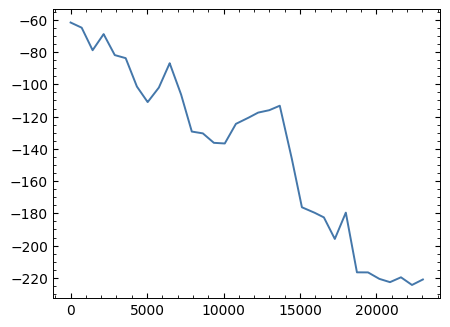

In [294]:
plt.plot(interpolated_Q_c)

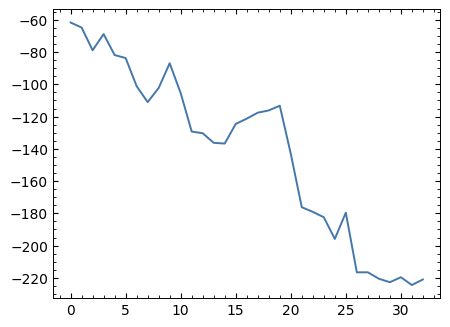

In [295]:
plt.plot(Q_c)

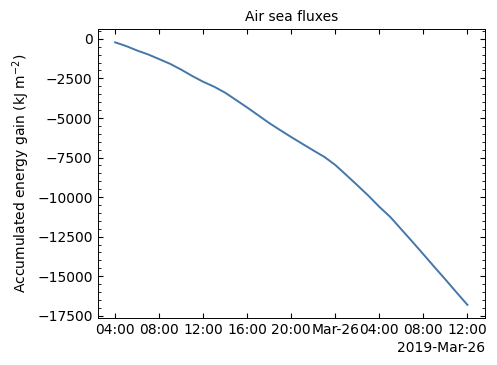

In [302]:
fig, ax = plt.subplots()
locator = mdates.AutoDateLocator(minticks=4, maxticks=None)
formatter = mdates.ConciseDateFormatter(locator)
minor_locator = mdates.AutoDateLocator(minticks=6)

ax.plot(ds_buoy.date.loc[date_10_c:date_11_c], energy_c)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel('Accumulated energy gain (kJ m$^{-2}$)')
ax.set_title('Air sea fluxes')
plt.show()

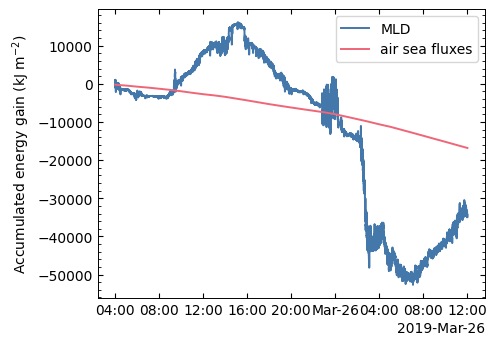

In [309]:
fig, ax = plt.subplots()
locator = mdates.AutoDateLocator(minticks=4, maxticks=None)
formatter = mdates.ConciseDateFormatter(locator)
minor_locator = mdates.AutoDateLocator(minticks=6)
ax.plot(data.date.loc[date_10_c:date_11_c][:-1], cum_energy_temp, label='MLD')
ax.plot(ds_buoy.date.loc[date_10_c:date_11_c], energy_c, label='air sea fluxes')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylabel('Accumulated energy gain (kJ m$^{-2}$)')
ax.legend()
plt.show()

In [5]:
display_video('deepening_MLD_end_march_high_res.mp4')

1


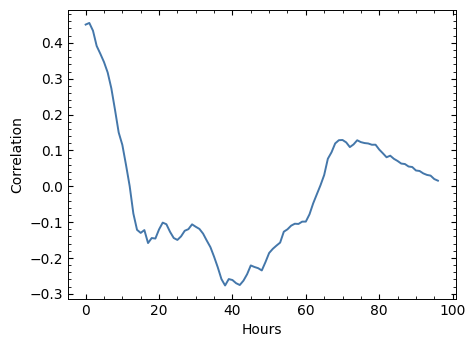

In [307]:
D1_ = df_ci[date_10:date_11:120*6]['D1'].to_numpy()
Qe_ = -ds_buoy.Qe.loc[date_10:date_11].data
Qh_ = -ds_buoy.Qh.loc[date_10:date_11].data
ccf_12 = ccf(Qe_ + Qh_, D1_, adjusted=False)
print(np.argmax(ccf_12))
fig, ax = plt.subplots()
ax.plot((ds_buoy.date.loc[date_10:date_11] - ds_buoy.date.loc[date_10])/3.6e12, ccf_12)
ax.set_xlabel('Hours')
ax.set_ylabel('Correlation')
plt.show()

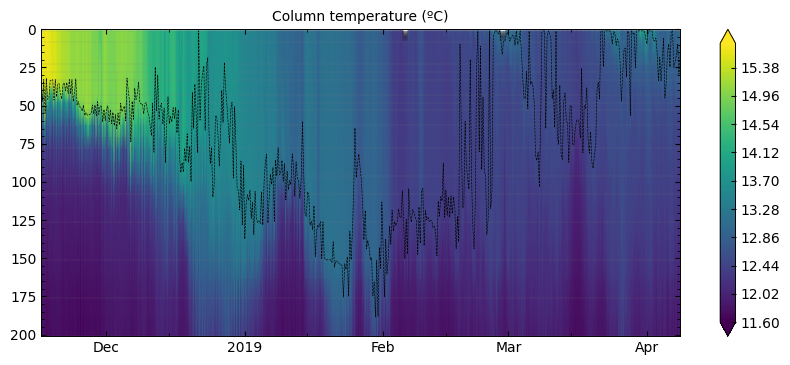

In [9]:
plot_column_temperature(data, df_ci)

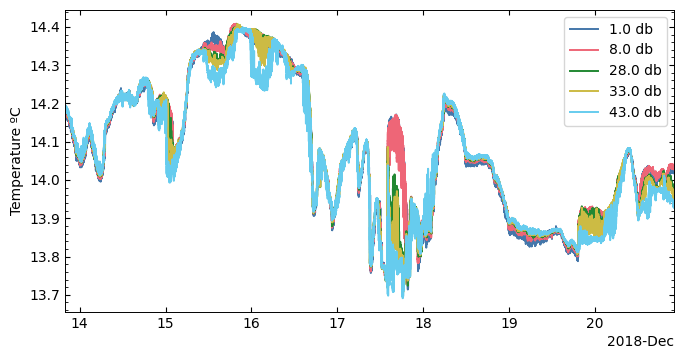

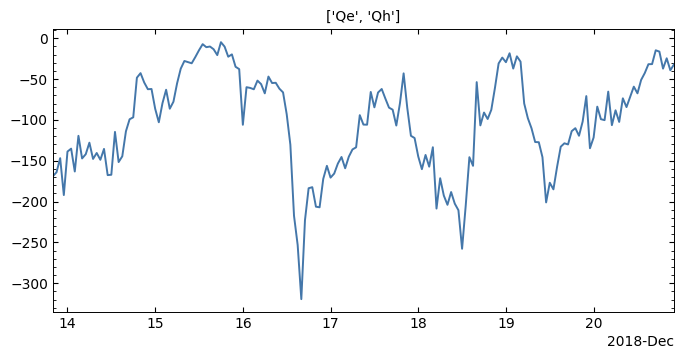

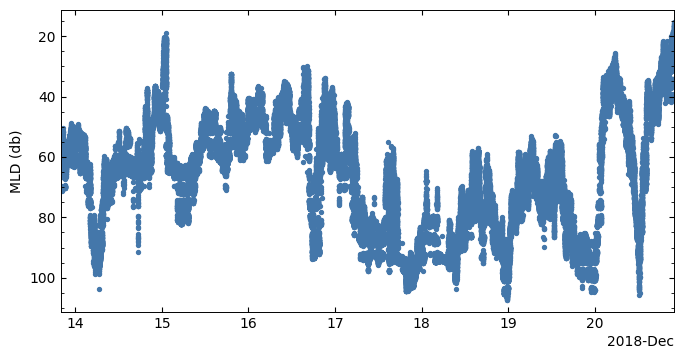

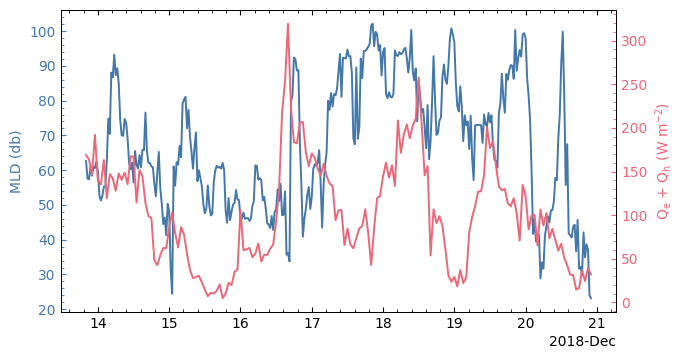

In [168]:
date_12 = datetime(2018, 12, 13, 20)
date_13 = datetime(2018, 12, 20, 22)
plot_thermistor_temperature(data, [0, 1, 3, 4, 5], period=[date_12, date_13], xlim=[date_12, date_13])
plot_AGL_data(ds_buoy, ['Qe', 'Qh'], period=[date_12, date_13])
plot_fit_variable(df_ci, 'D1', period=[date_12, date_13], xlim=[date_12, date_13])
plot_MLD_and_fluxes(df_ci, ds_buoy, period=[date_12, date_13])


4


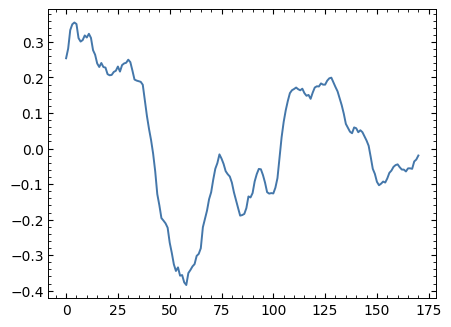

In [136]:
sampling_rate = period_to_freq(5, 's')
highcut = period_to_freq(11, 'h')
lowcut = period_to_freq(15, 'h')
D1_filtered_series = bandstop_filter(df_ci.D1, df_ci.index, sampling_rate, lowcut, highcut, order=5)
#(D1_filtered_series[date_12:date_13]).plot()
#df_ci[date_12:date_13].D1.plot()
D1_ = D1_filtered_series[date_12:date_13:120*6].to_numpy()
Qe_ = -ds_buoy.Qe.loc[date_12:date_13].data
Qh_ = -ds_buoy.Qh.loc[date_12:date_13].data
ccf_12 = ccf(D1_, Qe_ + Qh_, adjusted=False)
a = ds_buoy.date.loc[date_12:date_13][np.argmax(ccf_12)]
plt.plot((ds_buoy.date.loc[date_12:date_13] - ds_buoy.date.loc[date_12])/3.6e12, ccf_12)
#plt.axvline([np.argmax(ccf_12)])
print(np.argmax(ccf_12))

In [161]:
sampling_rate = period_to_freq(5, 's')
highcut = period_to_freq(8, 'h')
lowcut = period_to_freq(26, 'h')
D1_filtered_series = bandstop_filter(df_ci.D1, df_ci.index, sampling_rate, lowcut, highcut, order=5)
temp_filtered_series = bandstop_filter(data.temp[:, 9], df_ci.index, sampling_rate, lowcut, highcut, order=5)

<AxesSubplot:xlabel='date'>

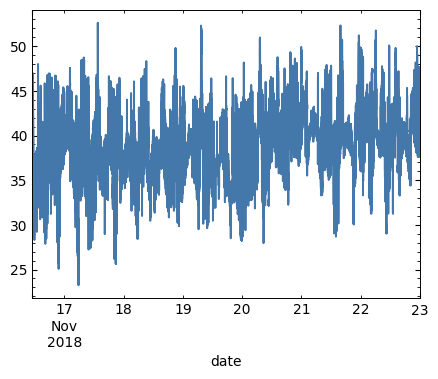

In [162]:
D1_filtered_series[datetime(2018, 11, 16, 11):datetime(2018, 11, 23)].plot()

<AxesSubplot:xlabel='date'>

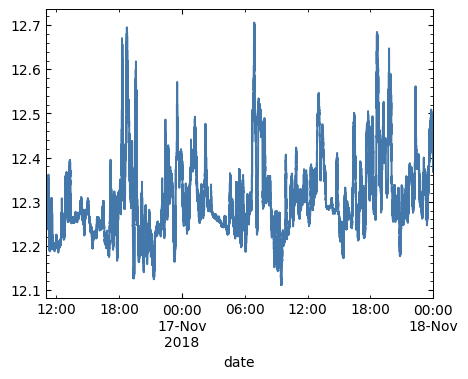

In [166]:
temp_filtered_series[datetime(2018, 11, 16, 11):datetime(2018, 11, 18)].plot()

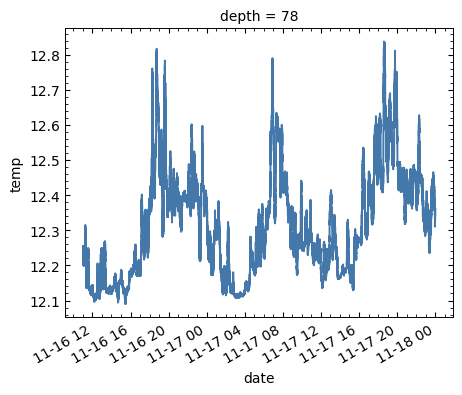

In [167]:
data.temp[:, 9].loc[datetime(2018, 11, 16, 11):datetime(2018, 11, 18)].plot()

<AxesSubplot:xlabel='date'>

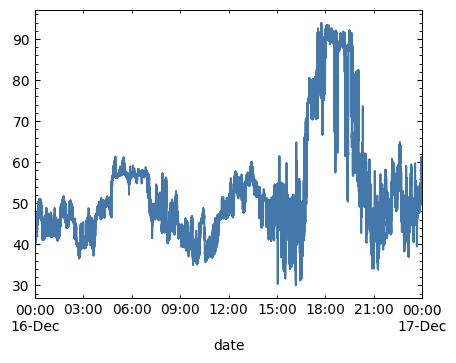

In [143]:
df_ci.D1[datetime(2018, 12, 16):datetime(2018, 12, 17)].plot()

$\Delta E_{MLD} = \rho D_1 \cdot c_{p} \cdot \Delta a_1$ (kJ m$^{-2}$)

In [335]:
data.depth

<xarray.DataArray 'depth' (depth: 16)>
array([  1,   8,  23,  28,  33,  43,  48,  53,  63,  78,  96, 108, 126, 151,
       176, 201], dtype=int32)
Coordinates:
  * depth    (depth) int32 1 8 23 28 33 43 48 53 63 78 96 108 126 151 176 201